<a href="https://colab.research.google.com/github/antocommi/SocialSentiment/blob/main/SentimentSocial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting up the environment

In [44]:
# Notebook - Progetto SOCIAL NETWORK
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [11]:
%cd drive/MyDrive/sentipolc

/content/drive/MyDrive


## --- DATA EXPLORATION --- 

In [22]:
df = pd.read_csv("training_set_sentipolc16.csv")
df.head(5)

,idtwitter,subj,opos,oneg,iro,lpos,lneg,top,text
0,122449983151669248,1,0,1,0,0,1,1,Intanto la partita per Via Nazionale si compli...
1,125485104863780865,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà Mario Monti..."
2,125513454315507712,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà #editoriale..."
3,125524238290522113,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...
4,125527933224886272,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...


### Distribuzione lunghezze testi raccolti
I testi sono stati estratti da twitter prima dell'estensione e quindi la distribuzione della lunghezza del testo è limitata a 140 caratteri

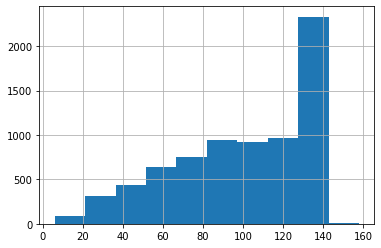

In [20]:
df['text'].str.len().hist()

### Distribuzione Lunghezza media parole 

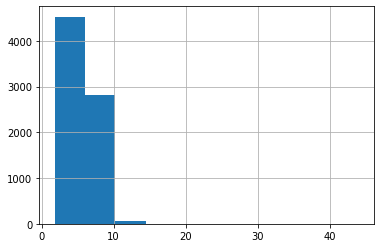

In [25]:
df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [42]:
# print(stopwords.words('italian'))
stop=set(stopwords.words('italian'))
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

DISTRIBUZIONE STOP WORD NEI DATI


<BarContainer object of 15 artists>

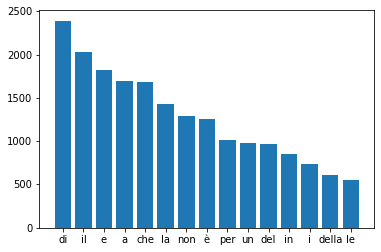

In [43]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
print("DISTRIBUZIONE STOP WORD NEI DATI")
plt.bar(x,y)

In [65]:
def plot_wordcloud(text):
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]
            words=[lem.lemmatize(w) for w in words if len(w)>2]
            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1
    )
    wordcloud=wordcloud.generate(str(corpus))
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop=set(stopwords.words('italian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


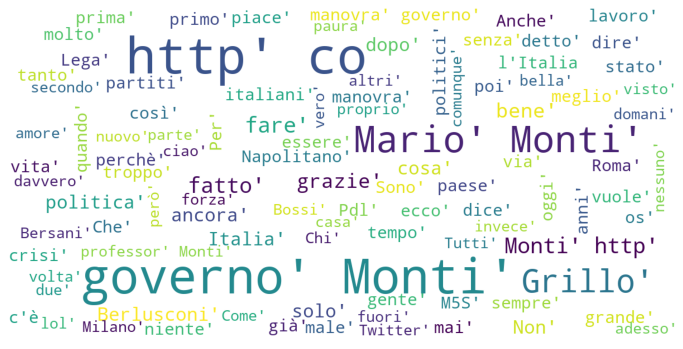

In [66]:
plot_wordcloud(df['text'])